## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

merged_data = pd.merge(mouse_metadata,study_results, on='Mouse ID')

merged_data.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice in the DataFrame.

merged_data['Mouse ID'].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new_df = merged_data[['Mouse ID','Timepoint']]

new_df[new_df.duplicated(keep = False)]

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# To do this we used .loc on the original merged df to return all values associated with Mouse ID g989 

merged_data.loc[merged_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Check number of rows in dataframe prior to dropping duplicates

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = merged_data.loc[merged_data['Mouse ID'] !='g989',:]

cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

# Since we are looking for data for each drug regimen, we must first groupby that column
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM for Tumor Volume on the Group

grouped_mean = grouped_data['Tumor Volume (mm3)'].mean()

grouped_median = grouped_data['Tumor Volume (mm3)'].median()

grouped_variance = grouped_data['Tumor Volume (mm3)'].var()

grouped_sd = grouped_data['Tumor Volume (mm3)'].std()

grouped_sem = grouped_data['Tumor Volume (mm3)'].sem()


# Combine the values above into a single summary dataframe

summary_df = pd.DataFrame({'Mean Tumor Volume':grouped_mean,
                           'Median Tumor Volume':grouped_median,
                           'Tumor Volume Variance':grouped_variance,
                           'Tumor Volume Standard Deviation':grouped_sd,
                           'Tumor Volume SEM':grouped_sem})

summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

# Groupby on the Drug Regimen, agg on the Tumor Volume for each stat, followed by a rename to create the summary table

summary_df2 = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']).rename(columns = {'mean':'Mean Tumor Volume','median':'Median Tumor Volume','var':'Tumor Volume Variance','std':'Tumor Volume Standard Deviation','sem':'Tumor Volume SEM'})


summary_df2.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

Text(0.5, 1.0, 'Mice Mortality over Time by Drug Regimen')

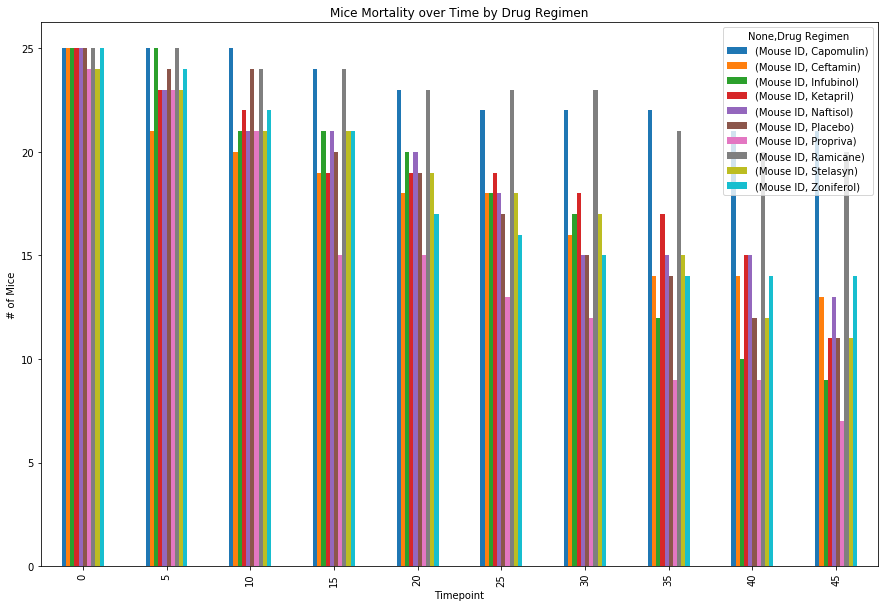

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# Set number of mice value

# To do this, we need to find the number of mice per drug regimen by timepoint so we first need to group the data by Drug regimen and timepoint

grouped_data_2 = cleaned_data.groupby(['Drug Regimen','Timepoint'])


# Create a dataframe from the groupby based on the counts of the columns

grouped_df_2 = grouped_data_2.count()

# Isolate the count of Mouse ID

grouped_df_2 = grouped_df_2[['Mouse ID']]

# Unstack the data so it reads more presentably and can easily be converted into a chart with the drug regimen columns across the top (level=0 parameter)

grouped_df_2 = grouped_df_2.unstack(level=0)

# Plot the dataframe

ax = grouped_df_2.plot(kind = 'bar',figsize =(15,10))
ax.set_xlabel("Timepoint")
ax.set_ylabel("# of Mice")
ax.set_title("Mice Mortality over Time by Drug Regimen")





In [11]:
# Extrapolate the column names so they can be easily referenced in the next section

grouped_df_2.info()

grouped_df_2.columns.levels

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (Mouse ID, Capomulin)  10 non-null     int64
 1   (Mouse ID, Ceftamin)   10 non-null     int64
 2   (Mouse ID, Infubinol)  10 non-null     int64
 3   (Mouse ID, Ketapril)   10 non-null     int64
 4   (Mouse ID, Naftisol)   10 non-null     int64
 5   (Mouse ID, Placebo)    10 non-null     int64
 6   (Mouse ID, Propriva)   10 non-null     int64
 7   (Mouse ID, Ramicane)   10 non-null     int64
 8   (Mouse ID, Stelasyn)   10 non-null     int64
 9   (Mouse ID, Zoniferol)  10 non-null     int64
dtypes: int64(10)
memory usage: 880.0 bytes


FrozenList([['Mouse ID'], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']])

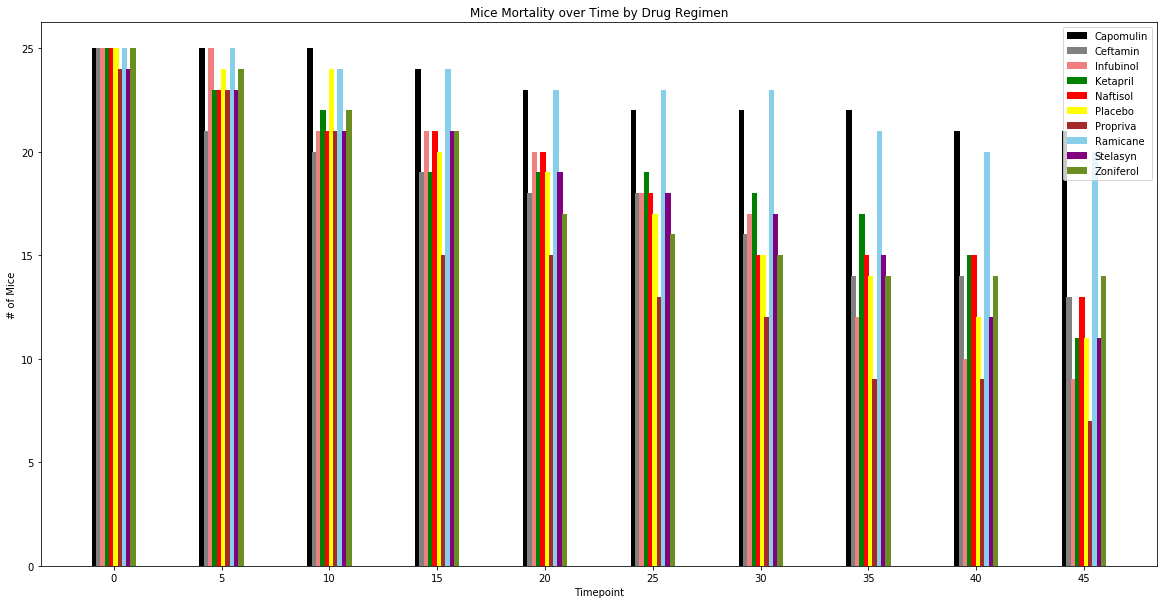

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Set the x values of the matplotlib plot as a list of values from 0 to the max value of
# Timepoint+5 incrementing by 5 for the timepoint


x = np.arange(0,cleaned_data['Timepoint'].max()+5,5)

# Create a variable for each the values of each drug regimen group in the grouped_df2 Dataframe created in the cell above

y_capomulin = grouped_df_2[('Mouse ID','Capomulin')]

y_ceftamin = grouped_df_2[('Mouse ID','Ceftamin')]

y_infubinol = grouped_df_2[('Mouse ID','Infubinol')]

y_ketapril = grouped_df_2[('Mouse ID','Ketapril')]

y_naftisol = grouped_df_2[('Mouse ID','Naftisol')]

y_placebo = grouped_df_2[('Mouse ID','Placebo')]

y_propriva = grouped_df_2[('Mouse ID','Propriva')]

y_ramicane = grouped_df_2[('Mouse ID','Ramicane')]

y_stelasyn = grouped_df_2[('Mouse ID','Stelasyn')]

y_zoniferol = grouped_df_2[('Mouse ID','Zoniferol')]


# Plot each variable as an invidiual data series on the chart

plt.figure(figsize=(20,10))
plt.bar(x-.9, y_capomulin, width=0.25, color='black', align='center',label='Capomulin')
plt.bar(x-.7, y_ceftamin, width=0.25, color='gray', align='center',label = 'Ceftamin')
plt.bar(x-.5, y_infubinol, width=0.25, color='lightcoral', align='center',label = 'Infubinol')
plt.bar(x-.3, y_ketapril, width=0.25, color='green', align='center',label = 'Ketapril')
plt.bar(x-.1, y_naftisol, width=0.25, color='red', align='center',label = 'Naftisol')
plt.bar(x+.1, y_placebo, width=0.25, color='yellow', align='center',label = 'Placebo')
plt.bar(x+.3,y_propriva,width=0.25, color='brown', align='center',label = 'Propriva')
plt.bar(x+.5, y_ramicane,width=0.25, color='skyblue', align='center',label = 'Ramicane')
plt.bar(x+.7, y_stelasyn,width=0.25, color='purple', align='center',label = 'Stelasyn')
plt.bar(x+.9, y_zoniferol,width=0.25, color='olivedrab', align='center',label = 'Zoniferol')
plt.xticks(x)
plt.xlabel('Timepoint')
plt.ylabel('# of Mice')
plt.title('Mice Mortality over Time by Drug Regimen')
plt.legend(loc ='upper right')

plt.show()



## Pie Plots

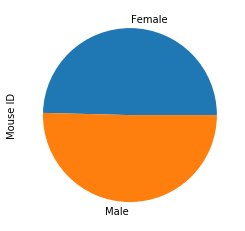

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group the mice by Sex

grouped_mice = cleaned_data.groupby('Sex')

# Count the number of unique Mouse ID values in each group and store 

pie_data = grouped_mice['Mouse ID'].nunique()

# Plot the data

pie_data.plot(kind = 'pie')


([<matplotlib.patches.Wedge at 0x1fb19b83248>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

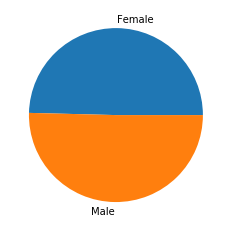

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Convert the data created above into a dataframe
pie_df = pd.DataFrame(pie_data)

# Plot the data and use the labels to separate the groups into female and male

plt.pie(pie_df['Mouse ID'],labels = ['Female','Male'])


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Create a final df that shows the final timepoint for each mouse

final_df_1 = cleaned_data.groupby('Mouse ID').max()['Timepoint']

final_df_1

# Merge this newly created dataframe with your original cleaned dataframe to return all the row values associate with that Mouse ID and Timepoint

final_df = pd.merge(final_df_1,cleaned_data,how='left',left_on = ['Mouse ID','Timepoint'],right_on = ['Mouse ID','Timepoint'])

final_df

# Create a list to store the 4 drug regimens we are evaluating

top4 = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Narrow the final_df down to display values for just the top 4 drug regimens

top4_df = final_df.loc[final_df['Drug Regimen'].isin(top4),:]

# Group the top 4 regimens by drug regimen 

grouped_drugs = top4_df.groupby('Drug Regimen')

grouped_drugs['Tumor Volume (mm3)'].mean().sort_values()


Drug Regimen
Ramicane     36.191390
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Name: Tumor Volume (mm3), dtype: float64

In [16]:
#IQR and outliers for Capomulin

# Create a dataframe that returns only the values for the Capomulin Drug Regimen

Capomulin_df = top4_df.loc[top4_df['Drug Regimen']=='Capomulin'].sort_values(by = 'Tumor Volume (mm3)')

# Isolate the Tumor volume column and store this value

Capomulin_volume = Capomulin_df['Tumor Volume (mm3)']

# Calculate the quartiles using quantile calculation

cap_quartiles = Capomulin_volume.quantile([.25,.5,.75])

cap_quartiles

cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]

#Capomulin IQR Calculation

cap_iqr = cap_upperq - cap_lowerq

print(f'The IQR for Capomulin is {cap_iqr}')

#Outliers calculation

# Initialize the Capomulin outliers to an empty list

cap_outliers = []

# Run a loop for all values in the Capomulin_volume list and append any outlier to the cap_outliers list

for x in Capomulin_volume:
    if x < cap_lowerq - 1.5*cap_iqr or x > cap_upperq + 1.5*cap_iqr:
        cap_outliers.append(x)

print(f'Outliers:{cap_outliers}')

# No outliers found for capomulin final tumor volume --> empty list



The IQR for Capomulin is 7.781863460000004
Outliers:[]


In [17]:
# Repeated process from above for Ramicane

#IQR and outliers for Ramicane
ram_df = top4_df.loc[top4_df['Drug Regimen']=='Ramicane'].sort_values(by = 'Tumor Volume (mm3)')

ram_volume = ram_df['Tumor Volume (mm3)']

ram_quartiles = ram_volume.quantile([.25,.5,.75])

ram_quartiles

ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]

#Ramicane IQR Calculation

ram_iqr = ram_upperq - ram_lowerq



print(f'The IQR for Ramicane is {ram_iqr}')

#Outliers calculation
#Calculate upper and lower bounds for outliers

ram_upperbound = ram_upperq +1.5*ram_iqr
ram_lowerbound = ram_lowerq -1.5*ram_iqr


#Create loop to populate outliers list
ram_outliers = []

for x in ram_volume:
    if x < ram_lowerbound or x > ram_upperbound:
        ram_outliers.append(x)

print(f'Outliers:{ram_outliers}')

# No outliers found in Ramicane final tumor volume --> empty list

The IQR for Ramicane is 9.098536719999998
Outliers:[]


In [18]:
# Repeated process from above for Infubinol

#IQR and outliers for Infubinol
inf_df = top4_df.loc[top4_df['Drug Regimen']=='Infubinol'].sort_values(by = 'Tumor Volume (mm3)')

inf_volume = inf_df['Tumor Volume (mm3)']

inf_quartiles = inf_volume.quantile([.25,.5,.75])

inf_quartiles

inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]


#Infubinol IQR Calculation

inf_iqr = inf_upperq - inf_lowerq



print(f'The IQR for Infubinol is {inf_iqr}')

#Outliers calculation
#Calculate upper and lower bounds for outliers

inf_upperbound = inf_upperq +1.5*inf_iqr
inf_lowerbound = inf_lowerq -1.5*inf_iqr


#Create loop to populate outliers list
inf_outliers = []

for x in inf_volume:
    if x < inf_lowerbound or x > inf_upperbound:
        inf_outliers.append(x)
print(f'Outliers:{inf_outliers}')



The IQR for Infubinol is 11.477135160000003
Outliers:[36.321345799999996]


In [19]:
# Repeated process from above for Ceftamin

#IQR and outliers for Ceftamin
cef_df = top4_df.loc[top4_df['Drug Regimen']=='Ceftamin'].sort_values(by = 'Tumor Volume (mm3)')

cef_volume = cef_df['Tumor Volume (mm3)']

cef_quartiles = cef_volume.quantile([.25,.5,.75])

cef_quartiles

cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]


#Infubinol IQR Calculation

cef_iqr = cef_upperq - cef_lowerq



print(f'The IQR for Ceftamin is {cef_iqr}')

#Outliers calculation
#Calculate upper and lower bounds for outliers

cef_upperbound = cef_upperq +1.5*cef_iqr
cef_lowerbound = cef_lowerq -1.5*cef_iqr


#Create loop to populate outliers list
cef_outliers = []

for x in cef_volume:
    if x < cef_lowerbound or x > cef_upperbound:
        cef_outliers.append(x)
print(f'Outliers: {cef_outliers}')



The IQR for Ceftamin is 15.577752179999997
Outliers: []


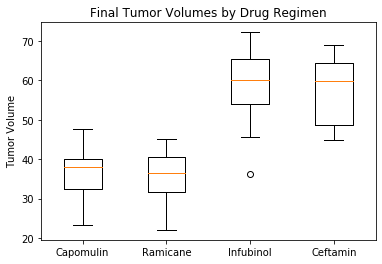

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Set the x values to be the tumor values extracted from the top4_df for each Drug Regimen

x = [Capomulin_volume,ram_volume,inf_volume,cef_volume]

# Set the labels as the corresponding Drug Regimen names

labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes by Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(x,labels=labels)
plt.show()

## Line and Scatter Plots

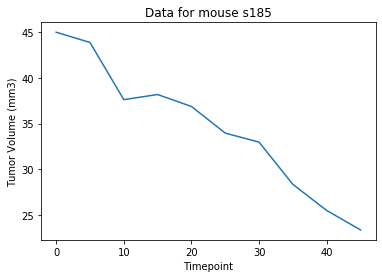

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cleaned_data.head()

# Narrow original DF down to just Capomulin data

Capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']

Capomulin_data.head()

# Choose first mouse (s185)

cap_mouse_df = Capomulin_data.loc[Capomulin_data['Mouse ID'] == 's185']

cap_mouse_df

# Create Line Plot with data

plt.plot(cap_mouse_df['Timepoint'],cap_mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Data for mouse s185')
plt.show()

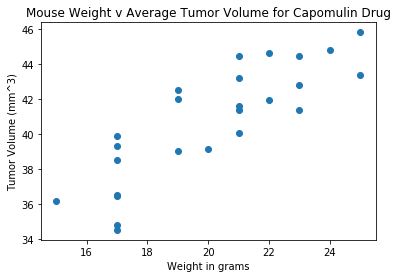

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Store the values for all mice in the Capomulin group

all_cap_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin',:]

# Group the mean data for all columns by Mouse ID

grouped_mice_cap = all_cap_data.groupby('Mouse ID').mean()

# Plot the mean weight column v the mean Tumor volume column

plt.scatter(grouped_mice_cap['Weight (g)'],grouped_mice_cap['Tumor Volume (mm3)'])
plt.xlabel('Weight in grams')
plt.ylabel('Tumor Volume (mm^3)')
plt.title('Mouse Weight v Average Tumor Volume for Capomulin Drug')
plt.show()


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculation the correlation coefficient using st.pearsonr on the Weight v Tumor Volumes plotted above

correlation = st.pearsonr(grouped_mice_cap['Weight (g)'],grouped_mice_cap['Tumor Volume (mm3)'])

print(f'The correlation between Mouse Weight and Tumor Volume in this data sample is {round(correlation[0],2)}.')


# Calculate the linear regression values for the Weight and Tumor Volumes plotted above

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(grouped_mice_cap['Weight (g)'],grouped_mice_cap['Tumor Volume (mm3)'])

print(f'The linear regression for this data set is y = {round(slope,2)}x + {round(intercept,2)}.')

The correlation between Mouse Weight and Tumor Volume in this data sample is 0.84.
The linear regression for this data set is y = 0.95x + 21.55.


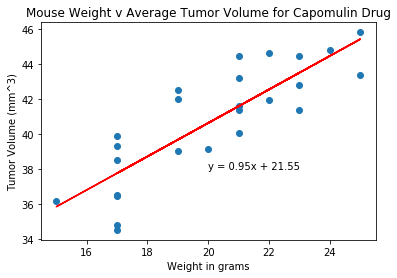

In [24]:
# Plotting the scatter plot with the regression line (for fun)

regress_values = slope*grouped_mice_cap['Weight (g)'] + intercept

plt.scatter(grouped_mice_cap['Weight (g)'],grouped_mice_cap['Tumor Volume (mm3)'])
plt.plot(grouped_mice_cap['Weight (g)'],regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(20,38))
plt.xlabel('Weight in grams')
plt.ylabel('Tumor Volume (mm^3)')
plt.title('Mouse Weight v Average Tumor Volume for Capomulin Drug')
plt.show()